In [406]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [407]:
import matplotlib
# matplotlib.use("TkAgg")
# %matplotlib tk
%matplotlib inline
import matplotlib.pyplot as plt

In [408]:
import dtnnlib as dtnn

In [409]:
# device = torch.device("cuda:0")
device = torch.device("cpu")

In [410]:
num_points = 400
X1 = np.linspace(-1.5, 1.5, num_points)
X2 = np.linspace(-1.5, 1.5, num_points)
X1, X2 = np.meshgrid(X1, X2)

XX = torch.Tensor(np.c_[X1.reshape(-1), X2.reshape(-1)]).to(device)

In [411]:
class DistanceVoronoi(nn.Module):
    
    def __init__(self, h):
        super().__init__()
        self.dt = dtnn.DistanceTransformBase(2, h)
        
    def forward(self, x):
        dists = self.dt(x)
#         class_probs = torch.argmin(dists, dim=1)
        return torch.argmin(dists, dim=1)

    def set_centroid(self, index, value):
        self.dt.centers[i] = torch.Tensor(value, dtype=self.dt.centers.dtype)
        pass

In [412]:
out = DistanceVoronoi(10)(XX)
torch.unique(out, return_counts=True)

(tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 tensor([17141,  3382, 37664,  1827, 12594,  2760, 13748,  3194, 48783, 18907]))

In [413]:
out.shape

torch.Size([160000])

In [414]:
regions = 10
voronoi = DistanceVoronoi(regions)
cls = voronoi(XX)

In [415]:
# plt.figure(figsize=(6, 6))
# cf = plt.contourf(X1, X2, cls.data.cpu().numpy().reshape(X1.shape),
#              alpha=1.0, antialiased=True, levels=regions+1, cmap='tab20')
# plt.scatter(*voronoi.dt.centers.data.cpu().t(), marker='+', color='gray', ec="k")

### Color marker same as centroids
# plt.scatter(embeddings[:,0], embeddings[:, 1], c=ilabels, s=2, cmap='tab10')

# cbar = plt.colorbar(ticks=range(10), #label='classes', 
#                     boundaries=np.arange(11)-0.5)
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(list(range(10)))

# plt.gca().set_prop_cycle(None)

print(cents.shape)
### plot vectors 

torch.Size([10, 2])


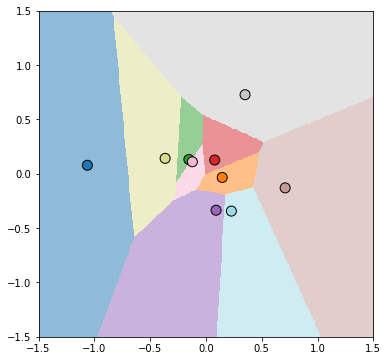

In [416]:
plt.figure(figsize=(6, 6))

cents = voronoi.dt.centers.data.cpu()
cent_label = np.arange(0, regions, step=1)

plt.scatter(*cents.t(), c=cent_label, s=100, cmap='tab20', ec='k')
    
# plt.gca().set_prop_cycle(None)
plt.imshow(cls.data.cpu().numpy().reshape(X1.shape), interpolation='nearest',
           extent=(-1.5, 1.5, -1.5, 1.5),
           alpha=0.5, cmap='tab20',
           aspect='auto', origin='lower')

In [417]:
cls

tensor([0, 0, 0,  ..., 7, 7, 7])

In [418]:
voronoi.dt.centers

Parameter containing:
tensor([[-1.0625,  0.0779],
        [ 0.1456, -0.0344],
        [-0.1532,  0.1310],
        [ 0.0780,  0.1261],
        [ 0.0904, -0.3359],
        [ 0.7097, -0.1303],
        [-0.1219,  0.1099],
        [ 0.3504,  0.7268],
        [-0.3659,  0.1413],
        [ 0.2275, -0.3437]], requires_grad=True)

In [419]:
class LinearVoronoi(nn.Module):
    
    def __init__(self, h):
        super().__init__()
        self.lin = nn.Linear(2, h, bias=False)
#         self.lin.weight.data /= torch.norm(self.lin.weight.data, dim=1, keepdim=True)
        
    def forward(self, x):
        dists = self.lin(x)
#         class_probs = torch.argmax(dists, dim=1)
        return torch.argmax(dists, dim=1)

    def set_centroid(self, index, value):
        self.dt.centers[i] = torch.Tensor(value, dtype=self.dt.centers.dtype)
        pass

In [420]:
regions = 10
voronoi = LinearVoronoi(regions)
cls = voronoi(XX)

In [421]:
torch.unique(cls, return_counts=True)

(tensor([0, 2, 5, 7, 8, 9]),
 tensor([45444, 34018,  1503, 17850, 45506, 15679]))

In [422]:
# plt.figure(figsize=(6, 6))
# cf = plt.contourf(X1, X2, cls.data.cpu().numpy().reshape(X1.shape),
#              alpha=1.0, antialiased=True, levels=regions+1, cmap='tab20')

# plt.scatter(*voronoi.lin.weight.data.cpu().t(), marker='+', color='gray', ec="white")

# ### plot vectors 

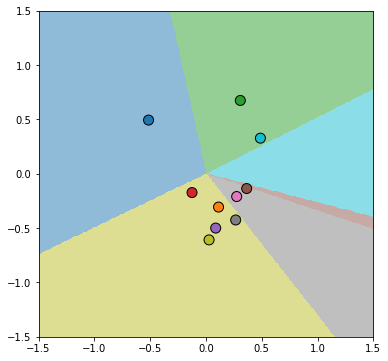

In [423]:
%matplotlib inline

plt.figure(figsize=(6, 6))

cls = voronoi(XX)
cents = voronoi.lin.weight.data.cpu()
cent_label = np.arange(0, regions, step=1)

plt.scatter(*cents.t(), c=cent_label, s=100, cmap='tab10', ec='k')
    
plt.gca().set_prop_cycle(None)
plt.imshow(cls.data.cpu().numpy().reshape(X1.shape), interpolation='nearest',
           extent=(-1.5, 1.5, -1.5, 1.5),
           alpha=0.5, cmap='tab10',
           aspect='auto', origin='lower')

In [424]:
voronoi.lin.weight.data

tensor([[-0.5145,  0.4933],
        [ 0.1126, -0.3067],
        [ 0.3077,  0.6738],
        [-0.1249, -0.1733],
        [ 0.0871, -0.4999],
        [ 0.3647, -0.1362],
        [ 0.2751, -0.2098],
        [ 0.2663, -0.4255],
        [ 0.0275, -0.6087],
        [ 0.4877,  0.3271]])

## After shifting the centers

In [425]:
voronoi.lin.weight.data -= 0.5

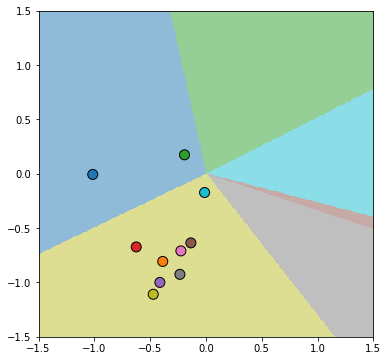

In [426]:
plt.figure(figsize=(6, 6))

cls = voronoi(XX)
cents = voronoi.lin.weight.data.cpu()
cent_label = np.arange(0, regions, step=1)

plt.scatter(*cents.t(), c=cent_label, s=100, cmap='tab10', ec='k')
    
plt.gca().set_prop_cycle(None)
plt.imshow(cls.data.cpu().numpy().reshape(X1.shape), interpolation='nearest',
           extent=(-1.5, 1.5, -1.5, 1.5),
           alpha=0.5, cmap='tab10',
           aspect='auto', origin='lower')